MNIST Deep Autoencoder

**Imports**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

**Prepare the Dataset**

In [2]:
def map_image(image, label):
  image = tf.cast(image, dtype=tf.float32)
  image = image / 255.0
  image = tf.reshape(image, shape=(784,))
  return image, image

In [3]:
# Load the train and test sets from TFDS

BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


**Build the Model**

In [4]:
def deep_autoencoder(input):
  encoder = tf.keras.layers.Dense(units=128, activation='relu')(input)
  encoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  encoder = tf.keras.layers.Dense(units=32, activation='relu')(encoder)

  decoder = tf.keras.layers.Dense(units=64, activation='relu')(encoder)
  decoder = tf.keras.layers.Dense(units=128, activation='relu')(decoder)
  decoder = tf.keras.layers.Dense(units=784, activation='sigmoid')(decoder)

  return encoder, decoder

input =  tf.keras.layers.Input(shape=(784,))
deep_encoder_output, deep_autoencoder_output = deep_autoencoder(input)
deep_encoder_model = tf.keras.Model(inputs=input, outputs=deep_encoder_output)

deep_autoencoder_model = tf.keras.Model(inputs=input, outputs=deep_autoencoder_output)

In [5]:
deep_autoencoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

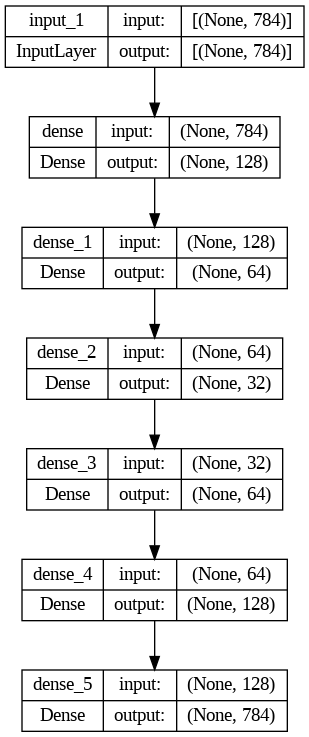

In [6]:
tf.keras.utils.plot_model(deep_autoencoder_model,show_shapes=True, show_layer_names=True)

**Compile and Train the Model**

In [7]:
train_steps = 60000 // BATCH_SIZE

deep_autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
deep_auto_history = deep_autoencoder_model.fit(train_dataset, steps_per_epoch=train_steps, epochs=50)

Epoch 1/50
468/468 [==============================] - 10s 12ms/step - loss: 0.2042
Epoch 2/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1347
Epoch 3/50
468/468 [==============================] - 3s 7ms/step - loss: 0.1191
Epoch 4/50
468/468 [==============================] - 4s 9ms/step - loss: 0.1109
Epoch 5/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1060
Epoch 6/50
468/468 [==============================] - 3s 6ms/step - loss: 0.1025
Epoch 7/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0998
Epoch 8/50
468/468 [==============================] - 4s 9ms/step - loss: 0.0975
Epoch 9/50
468/468 [==============================] - 3s 6ms/step - loss: 0.0954
Epoch 10/50
468/468 [==============================] - 3s 6ms/step - loss: 0.0937
Epoch 11/50
468/468 [==============================] - 3s 7ms/step - loss: 0.0925
Epoch 12/50
468/468 [==============================] - 4s 9ms/step - loss: 0.0915
Epoch 13/50
468/468 [==

**Display sample results**

In [8]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

1/1 [==============================] - 0s 200ms/step


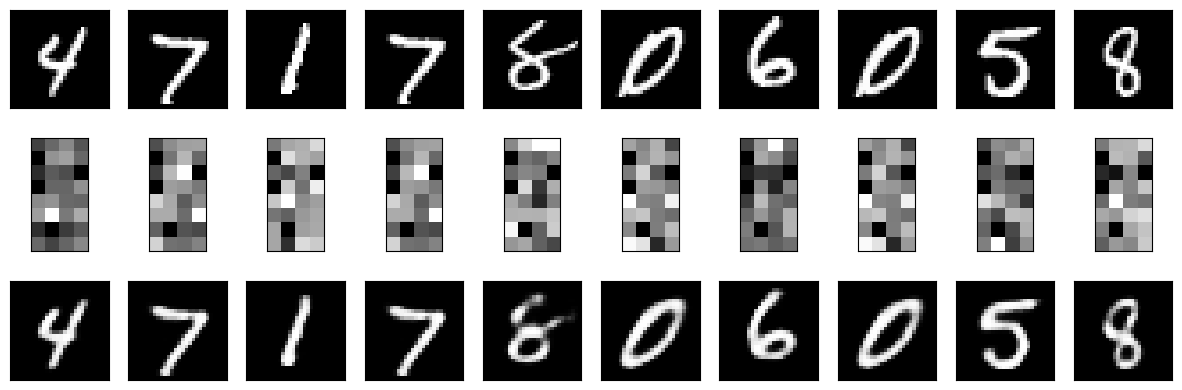

In [9]:
test_dataset = test_dataset.take(1)

output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

idxs = np.random.choice(BATCH_SIZE, size=10)

encoded_predicted = deep_encoder_model.predict(test_dataset)

deep_predicted = deep_autoencoder_model.predict(test_dataset)

display_results(output_samples[idxs], encoded_predicted[idxs], deep_predicted[idxs])